### Name = Decision Tree Classifier

## Installing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

1. <b>Numpy </b>: Numpy is a package in python used for scientific calculating and perform various operations. Numpy Array is a          multidimensional array whose indexed is similar to Sequences which is start with Zero that is used to store values of          same datatype Numpy in python uses less memory to store data as compared with python list. Numpy provides multiple              functions they are where, nonzero and count_nonzero for finding the element.

2. <b> Pandas </b>: Pandas is the most and favourite data science liabrary writtem for the python programming lanaguage for data manimulation and analysis also provides high_performance, easy to use strcutures and data analysis tools.

3. <b>Matplotlib </b>: Matlpotlib which was introduced by John Hunter is a multi-platform data visualization library built on Numpy arrays and designed to work with the broader SciPY stack. Similarly, Maltplot.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Pyplot is mainly intented for interactive plots and simple cases of programmatic plot generation.

4. <b>Seaborn</b>: Seaborn is a python data data visualization library based on matplotlib which provides high-level interfrace for drawing atractive and informative statistical graph. 

<b>Matplotlib vs Seaborn</b> <br>
Matplotlib is mainly used for basic plotting. Visulization using matplotlib generally consists of bars, pies, lines,scatter plot while seaborn provides variety of visualization patterns which use less syntax and has best themes.

6. <b> OS </b>: The OS module also known as Python's standard utility modules which provides functions for interacting with the operating system. This module is implemented by calling the standard C function system() method and has the same limitations.

7. <b> os.environ </b> : os.environ in python is a mapping object that represents the user's environment variables. This os.environ behaves like python dictionary, so all the common dictionary operations like get and set can be performed. 


In [2]:
from sklearn.datasets import make_classification
features , labels = make_classification(n_samples = 500, n_features = 4 , n_informative=3, 
                                            n_classes = 3 , weights=[0.2, 0.3, 0.5] ,n_redundant=0, n_clusters_per_class = 1 , random_state =584)


<b> sklearn </b>:  sklearn is machine learning library for Python that provides simple and efficient tools for data  analysis and data mining which is accessible to everybody and reusable in various context. It is build on <b> NumPy </b> and <b> SciPy </b> which is open source and commercially usable (BSD license) 

<b> sklearn.datasets </b> In this decision tree classification problem based on supervised machine learning I have used sklearn package to generate some random n-class classification problem.

<b>List of following parameters which I make used to generate random n-class classification problem are: </b> <br>
a. <b> n_samples </b> : First parameter n_samples means the number of samples which have implicit datatype (i.e. int). By default n_samples store 100 of data. In my Case I have stored 500 samples of data 

b. <b> n_features </b>: Second parameter n_features is the total number of features which determined how many columns of features the generated dataset will have. In Machine learning, features correspond to the numerical characteristics data. For example, in the above parameter n_features is set to int 4 i.e. 'Features_01' , 'Features_02' , 'Features_03' , 'Features_04'. so, there are 4 numerical columns in the random generated dataset. By adding more features on make_classification hence complexity of random dataset.

c. <b> n_informative </b>: Third parameter n_informative is the number of informative features. In machine learning informative correspond to the numerical value data. For example, in the above parameter n_informarive is to int 3 which is composed of a number of guassian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. <br>
    - Guassian Cluster : Gaussian Mixtire Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of there dstributions represent a cluster. 

d. <b> n_classes </b>: Fourth Parameter i.e. n_classes is the number or claaes or labels of the classification problem. For example, in above parameter n_classes is set to 3 which means it is highly dependent to n_features.

e. <b> weights </b>: Fifth parameter weights is same as list. In our case sum of weights is equal to 1 which returned n_samples.

f. <b> n_redundant </b>: n_redundant is the number of the reduntant features which generated random linear combinations of the informative features.

g. <b> n_clusters_per_class </b>: n_clusters_per_class is the number of clusters per class

h. <b> random_state </b>:  If you do not specify the <b> random_state </b> in your code, then every time you run(execute) your code a new random value is gnerated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like <b>random_state </b> = 584 then no matter how many times you execute your code the result would be the same i.e. sama values in train and test datasets.

In [3]:
features.shape

(500, 4)

<b> feature.shape </b>: The feature.shape property is usually used to get the current shape of an feature.

In [4]:
labels.shape

(500,)

<b> labels.shape </b>: The labels.shape property is usually used to get the current shape of an labels.

In [5]:
features[0] # returns feature value at 0 index

array([-0.6281029 , -1.47615301, -0.95052168, -1.20483239])

In [6]:
labels[2] # returns label value at 2 index

2

## List of total features

In [7]:
features_name = ['Features_01' , 'Features_02' , 'Features_03' , 'Features_04']
features_name

['Features_01', 'Features_02', 'Features_03', 'Features_04']

###### pd.dataframe is two-dimensional data structure where data is aligned in a tabular structured of row and column.

In [8]:
features_df = pd.DataFrame(features, columns = features_name)
features_df.head()

,Features_01,Features_02,Features_03,Features_04
0,-0.628103,-1.476153,-0.950522,-1.204832
1,2.122285,2.147409,-0.499541,-0.459959
2,1.217965,0.987744,0.224817,-0.488585
3,-2.962114,1.611845,0.244454,0.648196
4,-2.334218,1.824184,-0.271861,-1.342708


## Outcome Class

In [9]:
labels_name = ['Outcome']
labels_name

['Outcome']

In [10]:
labels_df = pd.DataFrame(labels , columns = labels_name)
labels_df.head()

,Outcome
0,1
1,2
2,2
3,1
4,0


<b> pd.concat </b>: Pandas provide various facilities for easily combining different dataframe together. In our case, we have joined features dataframe and label dataframe where feature dataframe is independent variable and label dataframe is dependent with feature dataframe

In [11]:
dataset = pd.concat([features_df , labels_df], axis =1 , join = 'inner' , sort = False)
dataset.head()

,Features_01,Features_02,Features_03,Features_04,Outcome
0,-0.628103,-1.476153,-0.950522,-1.204832,1
1,2.122285,2.147409,-0.499541,-0.459959,2
2,1.217965,0.987744,0.224817,-0.488585,2
3,-2.962114,1.611845,0.244454,0.648196,1
4,-2.334218,1.824184,-0.271861,-1.342708,0


### describe method()
    - describe method () is used to analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [12]:
dataset.describe()

,Features_01,Features_02,Features_03,Features_04,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,-0.118226,0.475981,0.062717,-0.040619,1.30000
std,1.539636,1.510484,1.047499,1.663991,0.77924
min,-4.341149,-7.040904,-3.067464,-4.795890,0.00000
25%,-1.209255,-0.233616,-0.660263,-1.294721,1.00000
50%,-0.043888,0.697692,0.019032,-0.107759,1.00000
75%,0.952176,1.483200,0.819864,1.116570,2.00000
max,3.608140,3.882441,3.009297,4.122572,2.00000


### Value Counting of outcome

<b> Pandas value_counts </b> built pandas function that returns an object containing counts of unique value in sorted order. In our case, I have used value_counts function and plotted histogram of outcome based on classification of outcome i.e 0 , 1  and 2

1. <b> plt.title </b>: Assigning title using  plt.title
2. <b> plt.xlabel </b>  and <b> plt.ylabel </b> we can assign labels to those respective axis. 
3. <b> plt.grid </b> is used to add grid lines changes in axix


C:\Users\Manish_Bhoge\AppData\Local\Temp\ipykernel_19676\3468481823.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


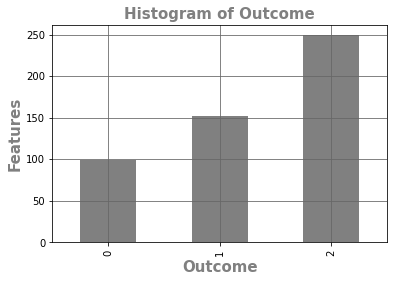

In [13]:
outcome_counts = pd.value_counts(dataset['Outcome'] , sort = True).sort_index()
outcome_counts.plot(kind = 'bar' , color = 'Gray')
plt.title('Histogram of Outcome', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Outcome', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Features', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

### info method()
    - pandas info () function is used to get a concise summary of the dataframe

In [14]:
dataset.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Features_01  500 non-null    float64
 1   Features_02  500 non-null    float64
 2   Features_03  500 non-null    float64
 3   Features_04  500 non-null    float64
 4   Outcome      500 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 17.7 KB


In [15]:
low_outcome = dataset[dataset['Outcome'] == 0]
medium_outcome = dataset[dataset['Outcome'] == 1]
high_outcome = dataset[dataset['Outcome'] == 2]
print('Low outcome of our dataset    :', low_outcome.shape)
print('Middle outcome of our dataset :', medium_outcome.shape)
print('High outcome of our dataset   :', high_outcome.shape)

Low outcome of our dataset    : (99, 5)
Middle outcome of our dataset : (152, 5)
High outcome of our dataset   : (249, 5)


In [16]:
dataset.Outcome.value_counts()

2    249
1    152
0     99
Name: Outcome, dtype: int64

<b> sns.scatterplot </b>: sns.scatterplot is used to show the relationship between x and y for different subset of the data using the hue, style and  palette paameters which is used for making graphics more accessible.

1. <b> x and y </b>: x and y is the input data variables which can be directly or reference column in dataset.

2. <b> hue  </b>:  name of variables that is used for grouping variables which produce points with different colors. For example, In our case class 0, 1 and 2 is different class separated by different colors.

3. <b> style </b>: style is the name of variable that will produce points with different markers.

4. <b> palatte </b>: Colors to use for the different lavels of the hue variable.

5. <b> data </b>: Dataframe where each column is a variable and each row is observation

<AxesSubplot:xlabel='Features_01', ylabel='Features_02'>

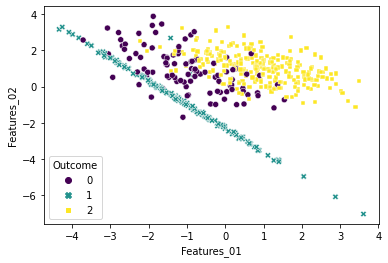

In [17]:
sns.scatterplot(x='Features_01' , y ='Features_02' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<AxesSubplot:xlabel='Features_01', ylabel='Features_03'>

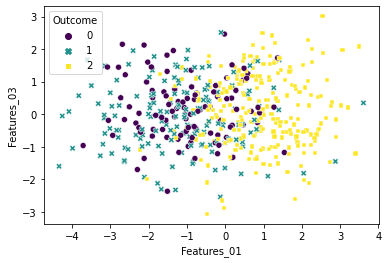

In [18]:
sns.scatterplot(x='Features_01' , y ='Features_03' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<AxesSubplot:xlabel='Features_01', ylabel='Features_04'>

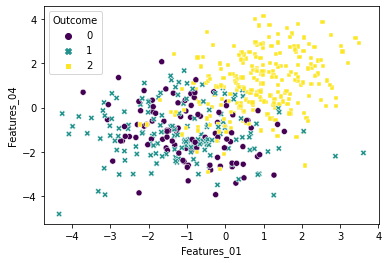

In [19]:
sns.scatterplot(x='Features_01' , y ='Features_04' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<AxesSubplot:xlabel='Features_02', ylabel='Features_03'>

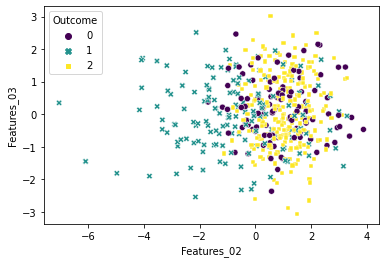

In [20]:
sns.scatterplot(x='Features_02' , y ='Features_03' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<AxesSubplot:xlabel='Features_02', ylabel='Features_04'>

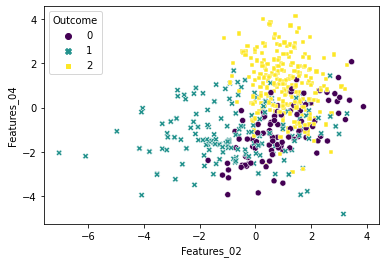

In [21]:
sns.scatterplot(x='Features_02' , y ='Features_04' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<AxesSubplot:xlabel='Features_03', ylabel='Features_04'>

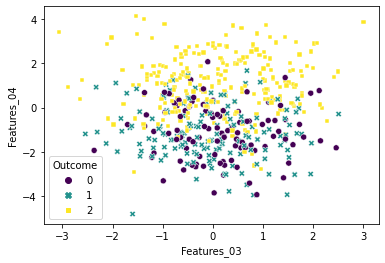

In [22]:
sns.scatterplot(x='Features_03' , y ='Features_04' , hue = 'Outcome'  , style = 'Outcome' , palette='viridis', data = dataset)


<b> scipy.stats </b>: This module contains large number of probability distributions as well as a growing library of statistical functions.

<b> scipy.stats.norm </b> : It is used for normal continous variable

<b> matplotlib.gridspec </b>: I have used a gridspec module to specifies the location of the subplot in the figure also this module specifies the geometry of the grid that a subplot will be placed.

<b> gridspec.GridSpec(28,1) </b>: Helps to set number of rows and number of columns.


I have choose bins equal to 50 then input will be divided into 50 intervals or bins if possible.

I have used loop to specifies geometry of grid from Features_01 to Features_04



In [34]:
from scipy.stats import norm
import matplotlib.gridspec as gridspec
col_features = dataset.iloc[:,0:4].columns
# col_features
bins = 50 

plt.figure( figsize = (12, 28 * 4))
gs = gridspec.GridSpec(28,1) 

for count, elem in enumerate(dataset[col_features]):
    print(count, elem)
    #ax = plt.subplot(gs[count])
    #sns.distplot(dataset[elem][dataset.Outcome == 0], bins = bins, fit=norm )
    #sns.distplot(dataset[elem][dataset.Outcome == 1], bins = bins, fit=norm)
    #sns.distplot(dataset[elem][dataset.Outcome == 2], bins = bins, fit=norm)
    #ax.set_xlabel('')
    #ax.set_title('histogram of feature: ' + str(elem), fontsize = '15', color = "gray" )
    #plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.show()

0 Features_01
1 Features_02
2 Features_03
3 Features_04


<Figure size 864x8064 with 0 Axes>

<b> SMOTE </b>  is an oversampling method which creates synthetic examples from minor class instead of creating samples. The algorithm selects two or more similar instances and creates one attribute instance at a time by a random amount within the difference to the neighboring instances.

SMOTE Process <br>
    - Indentify the feature vector and its nearest neighbors
    - Take the difference betweeen two neighbors between vector
    - Multiply the difference with a random number between 0 and  1
    - Identify a new point on the line segment by adding random number to feature vector 
    - Repeat the process for identified features vectors.

SMOTE method is approached to increase the minority classes in random created data.

In [24]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE as sm
x_sampled , y_sampled = sm().fit_resample(features, labels)
from collections import Counter ## separate collection for 0, 1 and 2 
print(sorted(Counter(y_sampled).items()))

[(0, 249), (1, 249), (2, 249)]


<b> Sklearn </b> provides best function for partitioning data into training set and testing set. We provide certain proportion of data to use as a test set and we can provide the parameter random_state to ensure repeatable results. test_size parameter decides the size of the data that has to be split as the the test dataset. In our we have used 20% of data for our testset and rest of 80% for train test.

In [26]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(x_sampled , y_sampled , test_size = 0.2 , random_state = 584)
print('Total training features :', xTrain.shape)
print('Total testing outcomes :', xTest.shape)

x_train_sampled_data = pd.DataFrame(xTrain)
y_train_sampled_data = pd.DataFrame(yTrain)
x_test_sampled_data  = pd.DataFrame(xTest)
y_test_sampled_data  = pd.DataFrame(yTest)

Total training features : (597, 4)
Total testing outcomes : (150, 4)


<b> Decision Tree </b>: A decision tree also known as classification and predition problem based on supervised machine learning where data is continuoulsy split according to the certain parameter.

#### Decision Tree consist of: 

1. <b> Nodes </b>: Test for the value of a certain attribute.

2. <b> Edges/ Branch </b>:  Correspond to the outcome of a test and connect to the next node or leaf.

3. <b> Leaf Nodes </b> : Terminal nodes that predict the outcome

### Decision Tree Classifier 

a. Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision).

b. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class. <br>

c. In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.

### Cross Validation

a. Cross validation is a resampling procecure used to evaluate machine learning models on a limeted data sample.

b. Technique that involves partitioning the original observation dataset into:
    i. training set - used to train the model, 
    ii. an independent set -  used to evaluate the analysis. <br>
c. The most common cross-validation technique is k-fold cross-validation in our solution I have put the value of K = 10 which means dataset will run 10 times and below the process will run 5 times, each time with different outout set


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(x_train_sampled_data,y_train_sampled_data)
yPred = clf.predict(x_test_sampled_data)
scores = cross_val_score(clf, y_test_sampled_data, yPred, cv=10)
print("Accuracy:",metrics.accuracy_score(yTest, yPred))
print(scores)

Accuracy: 0.82
[0.8        0.73333333 0.8        1.         0.73333333 0.86666667
 0.73333333 0.86666667 0.93333333 0.73333333]


A <b> confusion matrix </b> is an N by N matrix where N is the number of classes being predicted. Confusion matrix provide a more detailed breakdown of correct and incorrect classifications for each class where daigonal elements represents the number of points for which the predicted label is equal to the true label while anything off the diagonal was mislabeled by the classifier.
For best evaluation we need higher value in the diagonal of the confusion matrix.

In [28]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
y_predicted =  np.array(clf.predict(x_test_sampled_data))
y_right = np.array(y_test_sampled_data)

cnf = confusion_matrix(y_right, y_predicted )
np.set_printoptions(precision=2)
cnf

array([[43,  6,  3],
       [ 3, 49,  0],
       [15,  0, 31]], dtype=int64)

<b> Accuracy </b> is the mostly common used matrix to evaulated the model which is actually not a clear indicator of the performance.

Accuracy = (34 + 52 + 33) / (34 + 13 + 5 + 52 + 13 + 13) = 0.793

</b> Precision </b> is the percentage of positive instances out of the total predicted positive instances which means precision or positive predicted value means how much model is right when it says it is right.

Precision of Class 0 = (34/47) = 0.72 <br>
Precision of Class 1 = (52/65) = 0.8 <br>
Precision of classs 2 = (33/38) = 0.86 <br>

<b> Recall </b> is the percentage of positive instances out of the total actual positive instances. Recall shows how much extra right ones, the model missed when os showed the right ones.

Recall of class 0 = 34 / (52) = 0.65 <br>
Recall of class 1 = 52/ 52 = 1 <br>
Recall of class 2 = 33/46 = 0.717 <br>

<b> F1-Score</b>: F1- score is the harmoncic mean of the precision and recall which means higher the value of f1-score better will be the model. due to the product in the numerator if one goes low, the final F1 score goes down significantly. So a model does well in F1 score if the positive predicted are actually positives (precision) and doesn't miss out on positives and predicts them negative (recall).

F1-Score of class 0: 2PR/(P + R) =2 * 0.72 * 0.65 /(0.72 + 0.65) = 0.69 <br> 
F1-Score of class 1 = 2 * 0.8 * 1 / (0.8 + 1) = 0.89 <br>
F1 - Score of class 2 = 2 * 0.86 * 0.717 / (0.86 + 0.717) = 0.79 <br>

<b> Support </b> : It is the total number of element in each predicted class. Here, support for class 0 , 1 and 2 are 52, 52 and 46 respectively

<b> Macro Average </b>  = It is the normal average 

<b> Micro Average </b>  = sum(correct classification) / Total samples

<b> Weighted Average </b> = (Precision * Total Predicted) / Total Sample

<b> Specificity </b> also known as true negative class which is the number of items correctly identified as negative out of the total negatives. Exact oppositive to Recall

Specificity = TN / (TN + FP)





In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        52
           1       0.89      0.94      0.92        52
           2       0.91      0.67      0.78        46

    accuracy                           0.82       150
   macro avg       0.84      0.81      0.82       150
weighted avg       0.83      0.82      0.82       150



<AxesSubplot:>

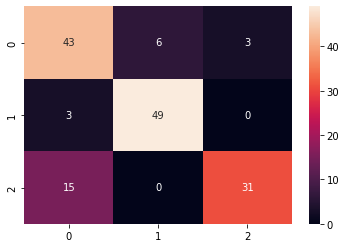

In [30]:
sns.heatmap(cnf , annot =  True)

The above used heatmap is a graphical representation of data in which heat maps displays numeric tabular data where the cells are colored depending upon the contained value.

In [31]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn import tree

In [33]:
import pydotplus
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=features_name)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

InvocationException: GraphViz's executables not found

The above code is used to plot the Decision tree. We can also export the tree in Graphviz format using the export_graphviz function exporter. The export_graphviz exporter also supports a variety oad aesthetic 